Importing Libraies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit,train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

To Read Csv File

In [ ]:
df = pd.read_csv('/content/sample_data/FINAL_USO (2) (1).csv',index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


To Checking Missing Values in Dataset


In [ ]:
df.isnull().sum()
df.isnull().values.any()

False

Describe The Shape of dataset

In [ ]:
df.shape

(1718, 80)

Describe the all statics of dataset

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


# **Effect of Index Prices on Gold Rates**


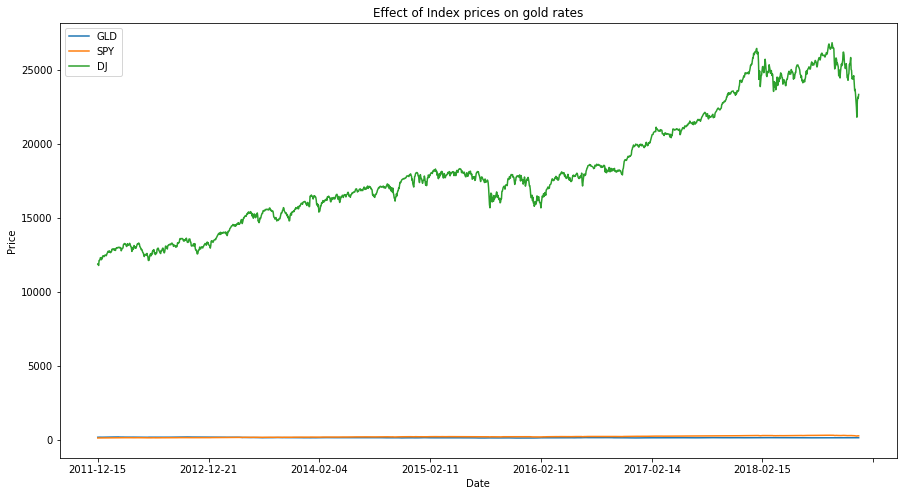

In [ ]:
GLD_adj_close = df['Adj Close']
SPY_adj_close = df['SP_Ajclose']
DJ_adj_close  = df['DJ_Ajclose']

df_p = pd.DataFrame({'GLD':GLD_adj_close, 'SPY':SPY_adj_close, 'DJ':DJ_adj_close})

df_ax = df_p.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

# **Calculation of Daily Returns of all Features**
We get it by subtracting the opening price from the closing price. Conveniently, Pandas has the pct_change method to calculate the percentage of changes in the daily returns.
## **shift() function**

The shift() function is used to shift index by desired number of periods with an optional time freq. Syntax: DataFrame.shift(self, periods=1, freq=None, axis=0, fill_value=None)

In [ ]:
def compute_daily_returns(df):
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

In [ ]:
GLD_adj_close = df['Adj Close']
SPY_adj_close = df['SP_Ajclose']
DJ_adj_close  = df['DJ_Ajclose']
EG_adj_close =  df['EG_Ajclose']
USO_Adj_close = df['USO_Adj Close']
GDX_Adj_close = df['GDX_Adj Close']
EU_price      = df['EU_Price']
OF_price      = df['OF_Price']
OS_price      = df['OS_Price']
SF_price      = df['SF_Price']
USB_price      = df['USB_Price']
PLT_price      = df['PLT_Price']
PLD_price      = df['PLD_Price']
rho_price      = df['RHO_PRICE']
usdi_price      = df['USDI_Price']

GLD_daily_return = compute_daily_returns(GLD_adj_close)
print(GLD_daily_return)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return     = compute_daily_returns(EG_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         =compute_daily_returns(OF_price)
OS_price         =compute_daily_returns(OS_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)
rho_price         =compute_daily_returns(rho_price)
USDI_price         =compute_daily_returns(usdi_price)


Date
2011-12-15    0.000000
2011-12-16    0.019038
2011-12-19   -0.002319
2011-12-20    0.013624
2011-12-21    0.001147
                ...   
2018-12-24    0.010950
2018-12-26   -0.002999
2018-12-27    0.007605
2018-12-28    0.004064
2018-12-31    0.001569
Name: Adj Close, Length: 1718, dtype: float64


# **Last 100 records of daily return of all features**
Here we can plot a graph for visualization of daily return values of 100 records

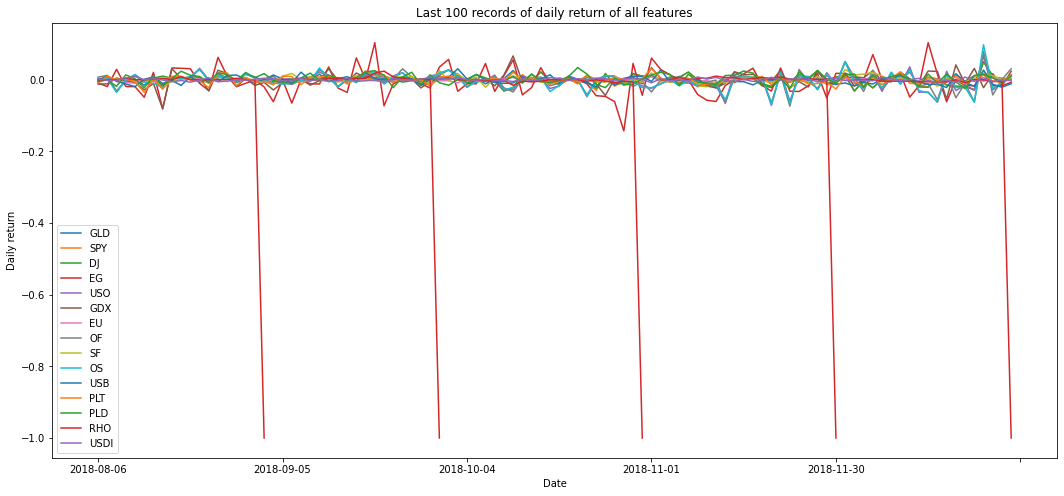

In [ ]:
df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return,
                    'EG':EG_adj_return,'USO':USO_Adj_return,'GDX':GDX_Adj_return,
                   'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price,
                  'USB':USB_price, 'PLT':PLT_price,
                   'PLD':PLD_price,'RHO':rho_price,'USDI':USDI_price})

gold_daily_ax= df_d[-100:].plot(title='Last 100 records of daily return of all features',figsize=(18,8))
gold_daily_ax.set_ylabel('Daily return')
gold_daily_ax.legend(loc='lower left')
plt.show()

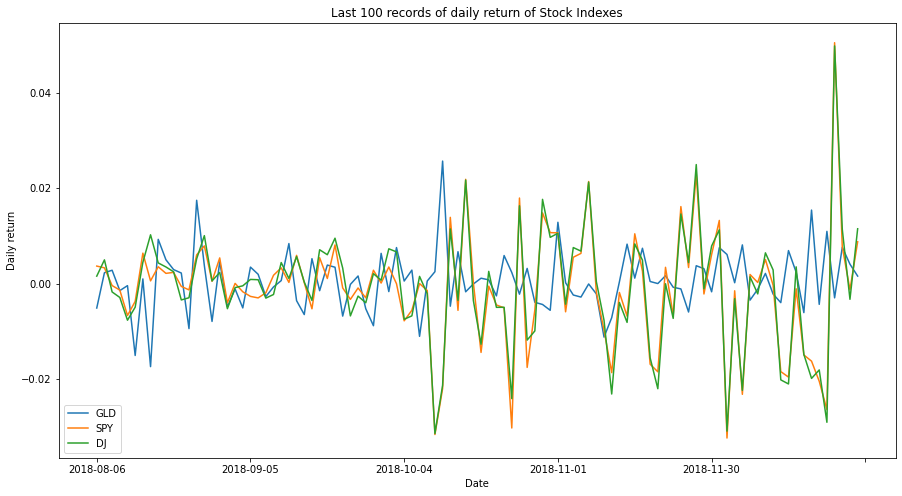

In [ ]:
df_s = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return})

daily_ax = df_s[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

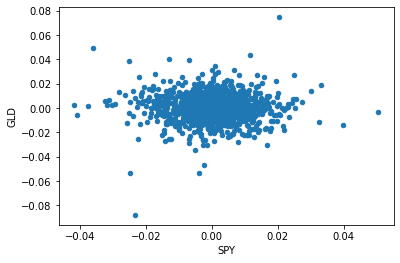

In [ ]:
df_d.plot(kind='scatter', x='SPY', y='GLD')

Mean= -8.65698612128203e-05
Standard Deviation= 0.009611536167006381
Kurtosis= 8.606584924918355


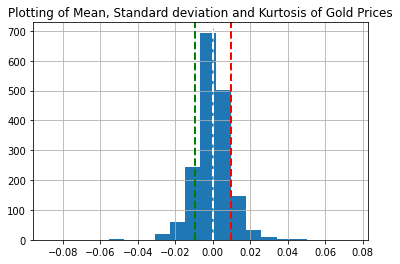

In [ ]:
mean=df_d['GLD'].mean()
# computing standard deviation of Gold stock
std=df_d['GLD'].std()
kurt=df_d['GLD'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['GLD'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='g',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

In [ ]:
#find outier
mean=df.mean()
std=df.std()
print(mean)
print(std)

Open             1.273234e+02
High             1.278542e+02
Low              1.267777e+02
Close            1.273195e+02
Adj Close        1.273195e+02
                     ...     
USO_High         2.230715e+01
USO_Low          2.190466e+01
USO_Close        2.210905e+01
USO_Adj Close    2.210905e+01
USO_Volume       1.922313e+07
Length: 80, dtype: float64
Open             1.752699e+01
High             1.763119e+01
Low              1.739651e+01
Close            1.753627e+01
Adj Close        1.753627e+01
                     ...     
USO_High         1.147867e+01
USO_Low          1.137400e+01
USO_Close        1.143279e+01
USO_Adj Close    1.143279e+01
USO_Volume       1.575743e+07
Length: 80, dtype: float64


In [ ]:
def generate_scores(mean=-8.65698612128203e-05,std_dev= 0.009611536167006381,num_samples=1718):
	np.random.seed(27)
	scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
	scores = np.round(scores, decimals=0)
	return scores
scores_data = generate_scores()
print(scores_data)

[ 0. -0.  0. ...  0.  0.  0.]


[Text(0.5, 1.0, 'Box Plot of Scores')]

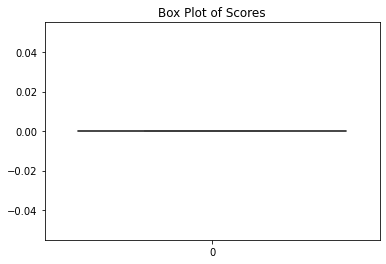

In [ ]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

In [ ]:
lower_limit, upper_limit = np.percentile(a=df,q=[0.5,99.5])
print(upper_limit)
print(lower_limit)

184053937.4999987
0.0


# **Correlation :**

1.Positive

2.Negative

In [ ]:
df2=df[['Close','SP_close','DJ_close','EG_close','EU_Price','OF_Price', 'OS_Price',
        'SF_Price','USB_Price','PLT_Price','PLD_Price',  'RHO_PRICE',
        'USDI_Price', 'GDX_Close','USO_Close']]
correlation = df2.corr()

# **Correlation Analysis:**

Plotting Correlation Matrix:

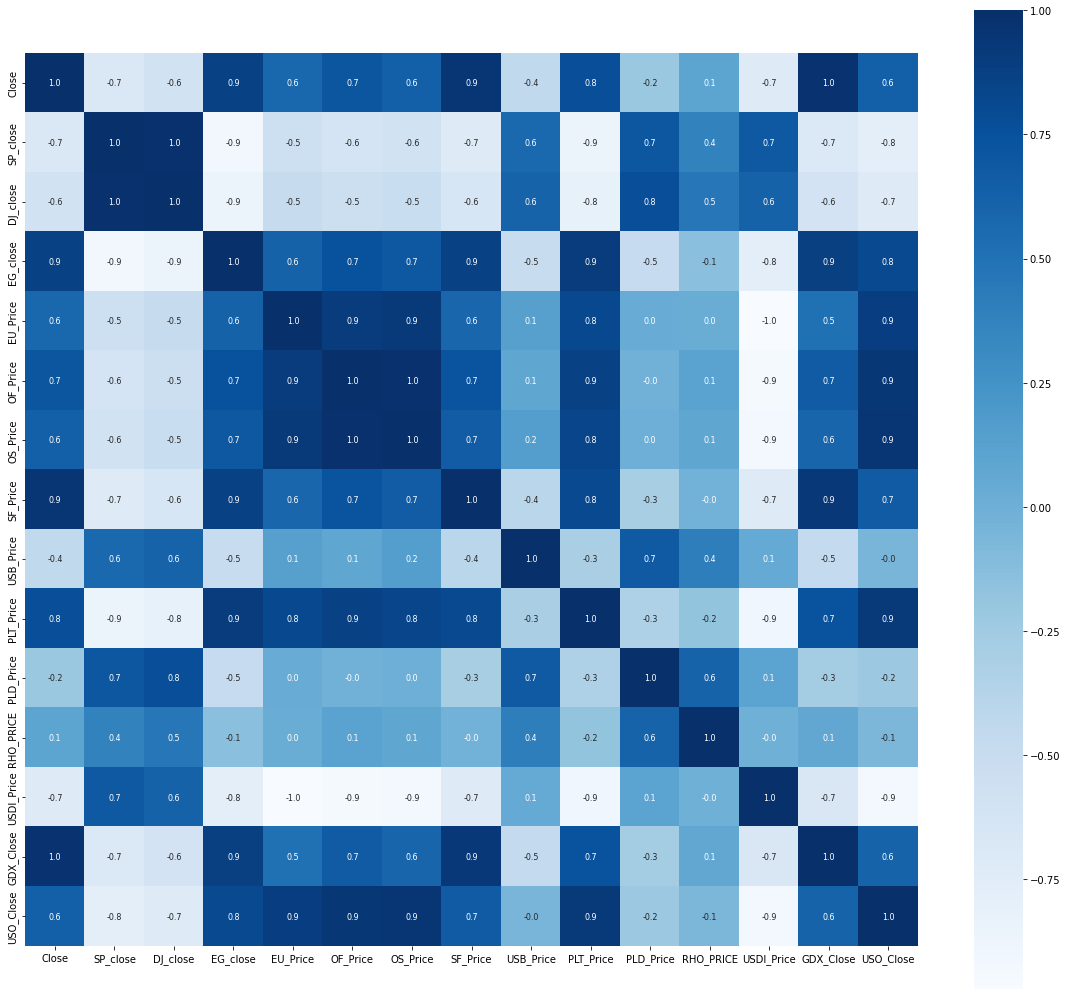

In [ ]:
# construction of heatmap to understand the correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',
            annot=True,annot_kws={'size':8}, cmap='Blues')

In [ ]:
X = df.drop(['Adj Close'], axis = 1)
X = X.drop(['Close'], axis = 1)

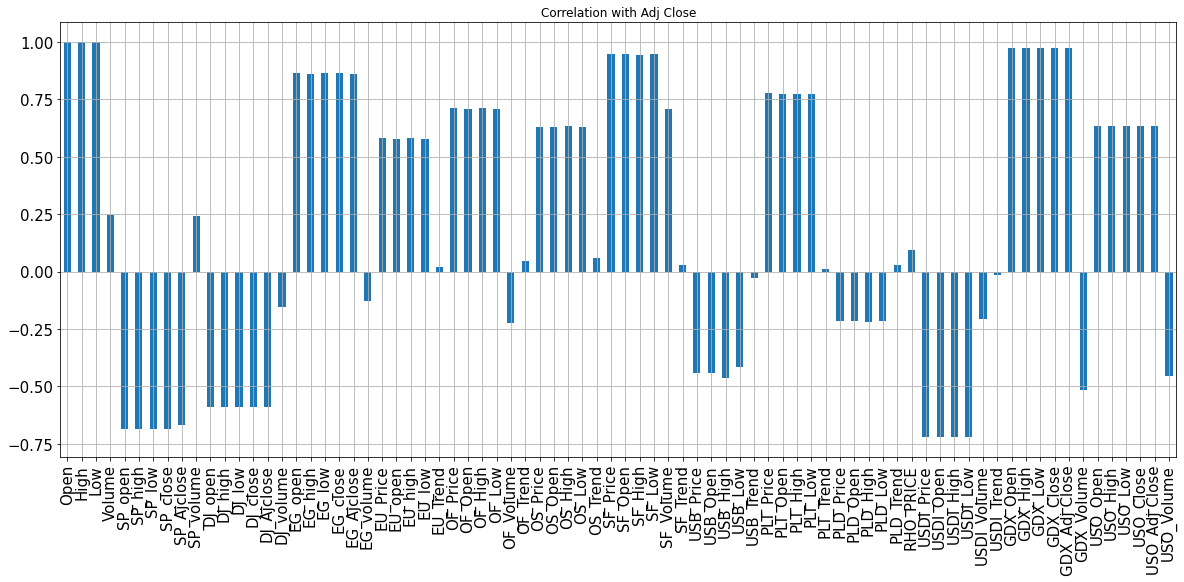

In [ ]:
X.corrwith(df['Close']).plot.bar(title = 'Correlation with Adj Close',
                                 rot = 90, grid = True,
                                 figsize = (20,8), fontsize = 15)

In [ ]:
correlation_matrix = df.corr()
coeff = correlation_matrix['Adj Close'].sort_values(ascending = False)

In [ ]:
posi_corr = coeff[coeff > 0]
posi_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

In [ ]:
nega_corr = coeff[coeff < 0]
nega_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

# **Checking The Distribution of the GLD price**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


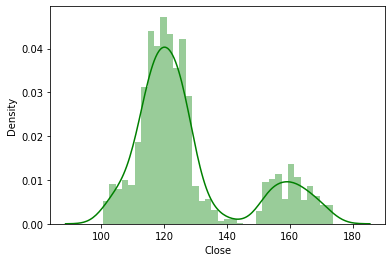

In [ ]:
#Checking The Distribution of the GLD price
sns.distplot(df['Close'],color='green')

# **Plotting Technical Indicators**

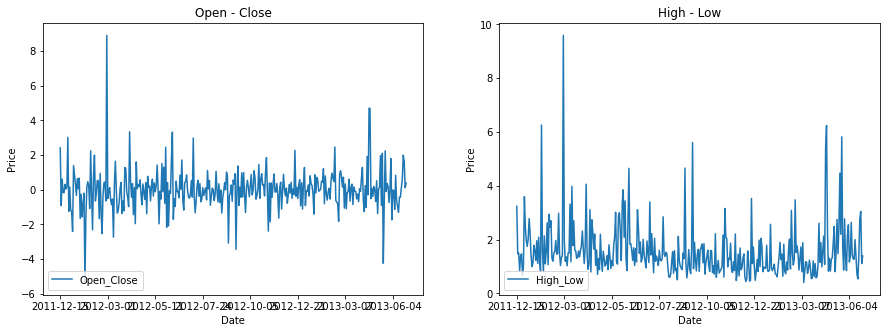

In [ ]:
figure, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

open_close =df.Open - df.Close
open_close[:365].plot(title = 'Open - Close', label = 'Open_Close', ax = axes[0])

high_low = df.High - df.Low
high_low[:365].plot(title = 'High - Low', label = "High_Low", ax = axes[1])

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')

axes[0].legend(loc = 'lower left')
axes[1].legend(loc = 'lower left')

# **Splitting The Features and Target**

In [ ]:
X = df.drop(['Open','Low','High',
             'Close','Adj Close','Volume'],axis=1)
Y = df['Adj Close']

In [ ]:
print(X)


               SP_open     SP_high      SP_low    SP_close  SP_Ajclose  \
Date                                                                     
2011-12-15  123.029999  123.199997  121.989998  122.180000  105.441238   
2011-12-16  122.230003  122.949997  121.300003  121.589996  105.597549   
2011-12-19  122.059998  122.320000  120.029999  120.290001  104.468536   
2011-12-20  122.180000  124.139999  120.370003  123.930000  107.629784   
2011-12-21  123.930000  124.360001  122.750000  124.169998  107.838242   
...                ...         ...         ...         ...         ...   
2018-12-24  239.039993  240.839996  234.270004  234.339996  234.339996   
2018-12-26  235.970001  246.179993  233.759995  246.179993  246.179993   
2018-12-27  242.570007  248.289993  238.960007  248.070007  248.070007   
2018-12-28  249.580002  251.399994  246.449997  247.750000  247.750000   
2018-12-31  249.559998  250.190002  247.470001  249.919998  249.919998   

            SP_volume      DJ_open   

In [ ]:
print(Y)

Date
2011-12-15    152.330002
2011-12-16    155.229996
2011-12-19    154.869995
2011-12-20    156.979996
2011-12-21    157.160004
                 ...    
2018-12-24    120.019997
2018-12-26    119.660004
2018-12-27    120.570000
2018-12-28    121.059998
2018-12-31    121.250000
Name: Adj Close, Length: 1718, dtype: float64


# **Splitting into Training Data and Test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# **Model Training:**
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# Training The Model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## **Model Evaluation **

In [ ]:
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[114.05499962 121.02730099 119.87660022 115.68399979 103.82169985
 115.95590078 126.14010091 124.88539932 128.71429862 119.77079999
 127.28369834 114.65839998 118.44819963 121.20560016 166.29449934
 119.5713004  115.3882009  116.42759905 123.33469934 121.48620001
 161.53880134 120.11220053 153.97549976 119.5763005  127.73280088
 153.84309992 156.0841006  126.98899864 118.12860034 118.16889965
 124.18570018 118.48489985 102.80329913 117.71469967 120.11580113
 119.9896004  160.60060056 120.26389974 117.51820041 162.91100029
 118.91369999 125.44780056 124.07969978 114.05330075 120.55950014
 122.67099941 161.49309955 120.62740023 114.08719947 135.52319939
 113.13890038 122.67959959 128.04029978 123.61559931 122.6455993
 154.52860062 112.66560011 125.93189955 121.32170088 125.15380033
 159.88960194 160.96439837 128.46539865 102.42669914 115.82049988
 162.68089934 157.03259949 113.39870101 121.1577997  123.20390056
 114.89589946 106.70510052 126.15919926 101.94219979 112.60799999
 160.321903

# **Calculate R Squared error**

In [ ]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error:",error_score)

R Squared error: 0.9943312908491315


# **Compare The Actucal Values and Predicted Values in a Plot**

In [ ]:
Y_test = list(Y_test)

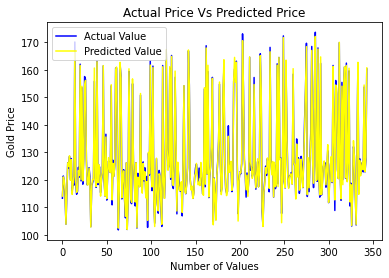

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()